In [1]:
import pandas as pd

In [2]:
rates = pd.read_csv('mortality_rate.csv')

In [5]:
codes = rates['ISO Code']

In [6]:
counter = 0
country_id = []
for code in codes:
    if counter < 1:
        counter += 1
        country_id.append(code)
    elif counter < 2:
        counter += 1
    else:
        counter = 0

In [7]:
ids = pd.DataFrame(country_id)

In [9]:
import numpy as np

In [11]:
df = rates['2011']

In [12]:
year2011 = df.groupby(np.arange(len(df))//3).mean()

In [13]:
year = pd.DataFrame(year2011)

In [15]:
ids = pd.DataFrame(country_id)

In [18]:
refined_data = pd.concat([ids,year],axis=1)

In [19]:
refined_data = refined_data.rename(columns={0:'ISO_Code','2011.5':'2011_Mortality_Rate'})

In [20]:
refined_data.to_csv('testing_data.csv')

In [21]:
df = pd.read_csv('primary_school.csv')

In [22]:
data = df.loc[:,['2011','ISO-alpha3 code']]

In [24]:
data = data.replace({'..':np.NaN})

In [25]:
data = data[data.columns[::-1]]
# Do not run again less the columns flip again ^ df.columns[::-1] reverses the order and df[] re-indexes the DataFrame

In [26]:
data = data.rename(columns={'ISO-alpha3 code':'ISO_Code'})

In [27]:
secondary_school = pd.read_csv('secondary_school.csv')

In [28]:
sec_sch_2011 = secondary_school.loc[:,['2011','ISO-alpha3 code']]

In [29]:
sec_sch_2011 = sec_sch_2011[sec_sch_2011.columns[::-1]]

In [30]:
data = data.replace({'..':np.NaN})
sec_sch_2011 = sec_sch_2011.replace({'..':np.NaN})

In [32]:
data = data.rename(columns={'ISO-alpha3 code':'ISO_Code', '2011':'primary_school'})
sec_sch_2011 = sec_sch_2011.rename(columns={'ISO-alpha3 code':'ISO_Code', '2011': 'secondary_school'})

In [34]:
# data & refined_data
final_table = pd.merge(data, refined_data, on='ISO_Code', how='inner')

In [35]:
final_table = pd.merge(final_table, sec_sch_2011, on='ISO_Code', how='inner')

In [36]:
final_table = final_table.dropna()

In [38]:
gdp_csv = pd.read_csv('Global_GDP.csv')

In [39]:
gdp_data = gdp_csv[['2011','Country Code']]

In [40]:
gdp_data = gdp_data[gdp_data.columns[::-1]]
# Do not run again less the columns flip again ^ df.columns[::-1] reverses the order and df[] re-indexes the DataFrame

In [41]:
gdp_data = gdp_data.rename(columns={'Country Code': 'ISO_Code','2011':'GDP'})

In [42]:
final_table = pd.merge(final_table, gdp_data, on='ISO_Code', how='inner')
final_table = final_table.dropna()

In [43]:
final_table = final_table.iloc[:,0:5]
final_table = final_table.rename(columns={'GDP_x':'GDP'})

In [44]:
final_table = final_table.rename(columns={'2011':'2011_Mortality_Rate'})
final_table = final_table[['ISO_Code','primary_school','secondary_school','GDP','2011_Mortality_Rate']]

In [46]:
final_table.to_csv('testing_data.csv')

Data Pre-Processing

In [47]:
X = final_table.loc[:, ['primary_school','secondary_school','GDP']]
y = final_table['2011_Mortality_Rate'].values.reshape(-1,1)
print(X.shape,y.shape)

(47, 3) (47, 1)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Using TensorFlow backend.
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.


In [49]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=3, kernel_initializer='random_uniform'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [50]:
model.compile(optimizer='adam',
             loss = 'mean_squared_error',
             metrics=['acc'])

model.fit(
    X_train_scaled, 
    y_train_scaled, 
    epochs=60, 
    shuffle=True, 
    verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
 - 0s - loss: 0.9951 - acc: 0.0000e+00
Epoch 2/60
 - 0s - loss: 0.9908 - acc: 0.0000e+00
Epoch 3/60
 - 0s - loss: 0.9872 - acc: 0.0000e+00
Epoch 4/60
 - 0s - loss: 0.9832 - acc: 0.0000e+00
Epoch 5/60
 - 0s - loss: 0.9792 - acc: 0.0000e+00
Epoch 6/60
 - 0s - loss: 0.9748 - acc: 0.0000e+00
Epoch 7/60
 - 0s - loss: 0.9701 - acc: 0.0000e+00
Epoch 8/60
 - 0s - loss: 0.9647 - acc: 0.0000e+00
Epoch 9/60
 - 0s - loss: 0.9590 - acc: 0.0000e+00
Epoch 10/60
 - 0s - loss: 0.9530 - acc: 0.0000e+00
Epoch 11/60
 - 0s - loss: 0.9464 - acc: 0.0000e+00
Epoch 12/60
 - 0s - loss: 0.9396 - acc: 0.0000e+00
Epoch 13/60
 - 0s - loss: 0.9319 - acc: 0.0000e+00
Epoch 14/60
 - 0s - loss: 0.9245 - acc: 0.0000e+00
Epoch 15/60
 - 0s - loss: 0.9165 - acc: 0.0000e+00
Epoch 16/60
 - 0s - loss: 0.9075 - acc: 0.0000e+00
Epoch 17/60
 - 0s - loss: 0.8981 - acc: 0.0000e+00
Epoch 18/60
 - 0s - loss: 0.8870 - acc: 0.0000e+00
Epoch 19/60
 - 0s - loss: 0.8761 - acc: 0.0

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7418646456307642
Testing Score: 0.5302307721100319


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Residual Plot')

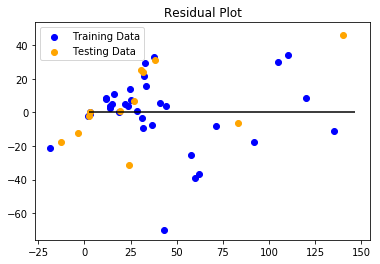

In [55]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  """
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  


In [58]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 167.98192453749203, R2: -6200.457422930636


In [59]:
predictions

array([[12.78538085],
       [12.25903028],
       [12.74510121],
       [12.27245188],
       [12.0753712 ],
       [12.48664031],
       [11.79687542],
       [11.9539669 ],
       [11.96089847],
       [12.41194287],
       [11.7392932 ],
       [11.88524358]])

In [60]:
primary_school = pd.read_csv('primary_school.csv')
secondary_school = pd.read_csv('secondary_school.csv')
df_gdp = pd.read_csv('Global_GDP.csv')
mortalities = pd.read_csv('mortality_rate.csv')

Predictions Chart

In [63]:
primary_school = pd.read_csv('primary_school.csv')
secondary_school = pd.read_csv('secondary_school.csv')
df_gdp = pd.read_csv('Global_GDP.csv')
mortalities = pd.read_csv('mortality_rate.csv')

In [65]:
IRE_primary = primary_school.loc[primary_school['Country'] == 'Ireland']
IRE_secondary = secondary_school.loc[secondary_school['Country'] == 'Ireland']
IRE_gdp = df_gdp.loc[df_gdp['Country Name'] == 'Ireland']
IRE_mort = mortalities.loc[mortalities['Country Name'] == 'Ireland']

In [66]:
codes = IRE_mort['ISO Code']

In [67]:
counter = 0
country_id = []
for code in codes:
    if counter < 1:
        counter += 1
        country_id.append(code)
    elif counter < 2:
        counter += 1
    else:
        counter = 0

In [68]:
country_id = pd.DataFrame(country_id)

In [69]:
IRE_mort = IRE_mort.groupby(np.arange(len(IRE_mort))//3).mean()

In [70]:
IRE_data = pd.concat([country_id, IRE_mort],axis=1)

In [71]:
IRE_primary = IRE_primary.iloc[:,2:]
# Do not run again

In [73]:
cols = list(IRE_primary.columns)
cols = [cols[-1]] + cols[:-1]
IRE_primary = IRE_primary[cols]

In [74]:
IRE_primary = IRE_primary.rename(columns={'ISO-alpha3 code':'ISO_Code'})

In [76]:
IRE_secondary = IRE_secondary.iloc[:,2:]
# Do not run again

In [77]:
cols = list(IRE_secondary.columns)
cols = [cols[-1]] + cols[:-1]
IRE_secondary = IRE_secondary[cols]

In [78]:
IRE_primary = IRE_primary.rename(columns={'ISO-alpha3 code':'ISO_Code'})

In [79]:
IRE_gdp = IRE_gdp.drop(['Country Name','Indicator Name'],axis=1)

In [80]:
IRE_gdp = IRE_gdp.rename(columns={'Country Code':'ISO_Code'})

In [81]:
IRE_primary = IRE_primary.iloc[:,1:]

In [82]:
IRE_primary = IRE_primary.transpose()
IRE_secondary = IRE_secondary.transpose()
IRE_gdp = IRE_gdp.transpose()
IRE_mort = IRE_mort.transpose()

In [83]:
IRE_primary = IRE_primary.rename(columns={103:'Primary_School'})
IRE_secondary = IRE_secondary.rename(columns={103:'Secondary_School'})
IRE_gdp = IRE_gdp.rename(columns={109:'GDP'})

In [85]:
joined_table = IRE_gdp.join(IRE_mort, how='inner')
joined_table = joined_table.join(IRE_primary)

In [86]:
joined_table = joined_table.replace({'..':np.NaN})
joined_table = joined_table.dropna()

In [91]:
joined_table = joined_table.rename(columns={0:'Mortality_Rate'})
joined_table = joined_table[['Primary_School','GDP','Mortality_Rate']]

In [93]:
import math
from sklearn import preprocessing

In [94]:
forecast_out = int(math.ceil(0.1*len(joined_table)))
# change the 0.1 later, predicts with 10% of the previous data

In [95]:
forecast_col = 'Mortality_Rate'
joined_table['label'] = joined_table[forecast_col].shift(-forecast_out)

In [96]:
X = np.array(joined_table.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]


/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [97]:
joined_table.dropna(inplace=True)
y = np.array(joined_table['label'])
y = np.array(joined_table['label'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [99]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[3.81326181 3.71035237 3.08525124 3.95903387] 0.9108947809778428 4


In [104]:
import datetime as datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time
style.use('ggplot')

In [105]:
joined_table["Forecast"] = np.NaN

In [106]:
last_date = joined_table.iloc[-1].name
last_unix = time.mktime(datetime.datetime.strptime(last_date, '%Y').timetuple())
one_year = 31536000
next_unix = last_unix + one_year

In [107]:
for i in forecast_set:
    next_year = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_year
    next_year = next_year.year
    joined_table.loc[next_year] = [np.NaN for _ in range(len(joined_table.columns)-1)] + [i]

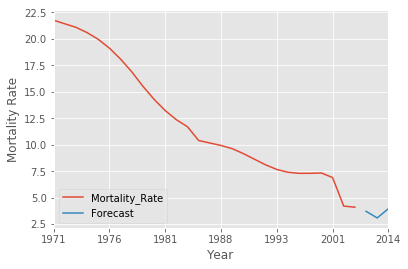

In [108]:
joined_table['Mortality_Rate'].plot()
joined_table['Forecast'].plot()
plt.legend(loc=3)
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()